<a href="https://colab.research.google.com/github/rahmadsubagiyo/boost_heart/blob/main/boosting_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Predict and Analysis using Classification Algorithm


---


## Objective:
To predict whether the patients does come heart attack or not

## Features:

*   age : Age of the patient
*   sex : Sex of the patient
*   exang: exercise induced angina (1 = yes; 0 = no)
*   ca: number of major vessels (0-3)
*   cp : Chest Pain type chest pain type
Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic

*   trtbps : resting blood pressure (in mm Hg)
*   chol : cholestoral in mg/dl fetched via BMI sensor
*   fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   rest_ecg : resting electrocardiographic results
Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

*   thalach : maximum heart rate achieved
*   target : 0 = less chance of heart attack, 1 = more chance of heart attack
---


## EDA and pipeline set-up

---


### Import Packages

In [26]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# Import LabelEncoder and StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Import stats
from scipy import stats

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# load libraries drive
from google.colab import drive

# mout drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [28]:
# Import dataset

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python/01. Heart Attack Prediction using Boosting Algoritm/Heart Attack Data Set.csv")
data = pd.DataFrame(data)

data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
for i in data.columns:
    print("Value counts of",i,'feature are : ')
    print(data[i].value_counts())
    print('Unique value count of', i, 'is', len(data[i].unique()))
    print()

Value counts of age feature are : 
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
Unique value count of age is 41

Value counts of sex feature are : 
1    207
0     96
Name: sex, dtype: int64
Unique value count of sex is 2

Value counts of cp feature are : 
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
Unique value count of cp is 4

Value counts of trestbps feature are : 
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142   

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Observation

*   All features have datatype int64, expect oldpeak, which has the datatype float64.
*   No missing/null values.
*   303 instances with 13 features and 1 target feature (output).

<Axes: >

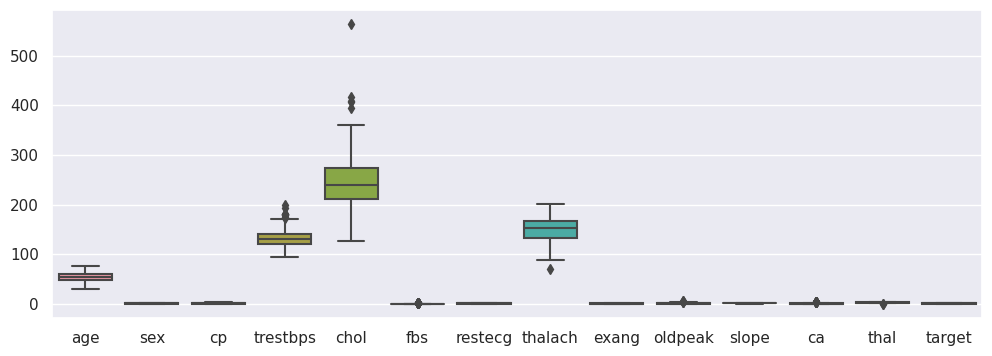

In [33]:
# Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.set(rc={"figure.figsize":(12, 4)})
sns.boxplot(data=data)

From the box plots, outliers are present in trestbps, chol, thalachh, oldpeak, ca and thal.

The Outliers can removed using two methods,

*   InterQuartile Range
*   Z-Score

We will use both methods and check the effect on the dataset.

In [34]:
# Find the InterQuartile Range

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

*********** InterQuartile Range ***********
age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [35]:
# Remove the outliers using IQR
data2 = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

(228, 14)

After removing outliers using IQR, the data contains 228 records.

In [36]:
# Removing outliers using Z-score
z = np.abs(stats.zscore(data))
data3 = data[(z<3).all(axis=1)]
data3.shape

(287, 14)

After using Z-score to detect and remove outliers, the number of records in the dataset is 287.

As the number of records available is higher after Z-score, we will proceed with 'data3'

## Correlation

After removing outliers from data, we will find the correlation between all the features.

Two types of correlation will be used here.

*  **Pearson Correlation**
*  **Spearman Correlation**

Text(0.5, 1.0, 'Pearson Correlation')

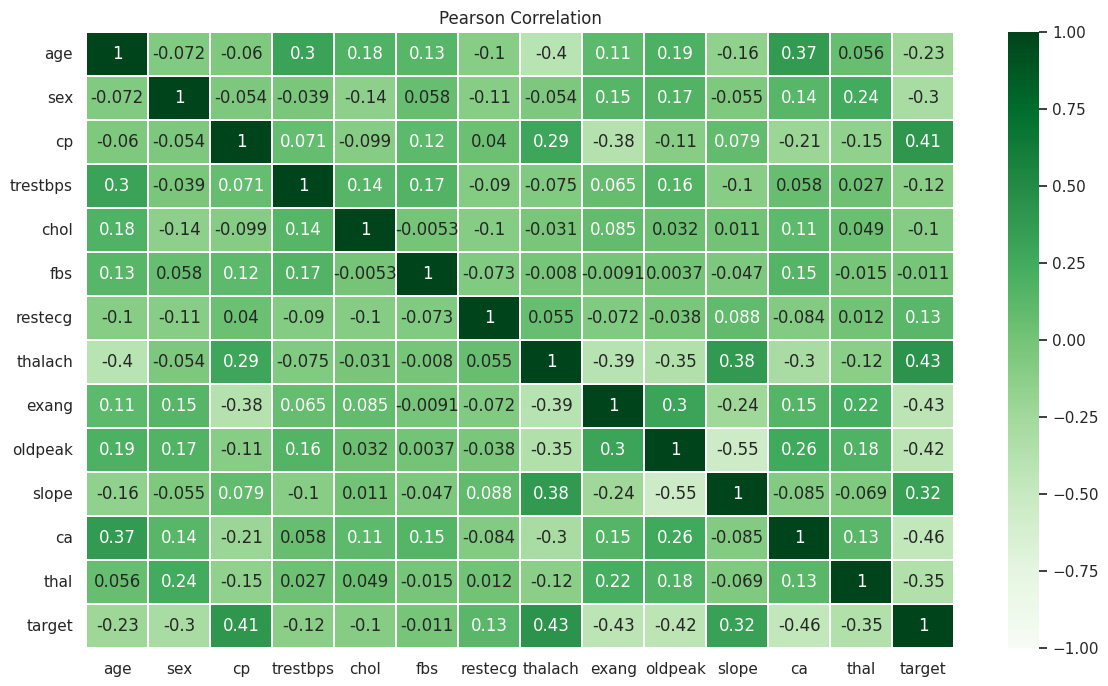

In [37]:
# Finding the correlation between variables

pearsonCorr = data3.corr(method='pearson')
spearmanCorr = data3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

From the heat map, the same values of correlation are repeated twice. To remove this, we will mask the upper half of the heat map and show only the lower half. The same procedure will be carried out for Spearman Correlation.

Text(0.5, 1.0, 'Pearson Correlation')

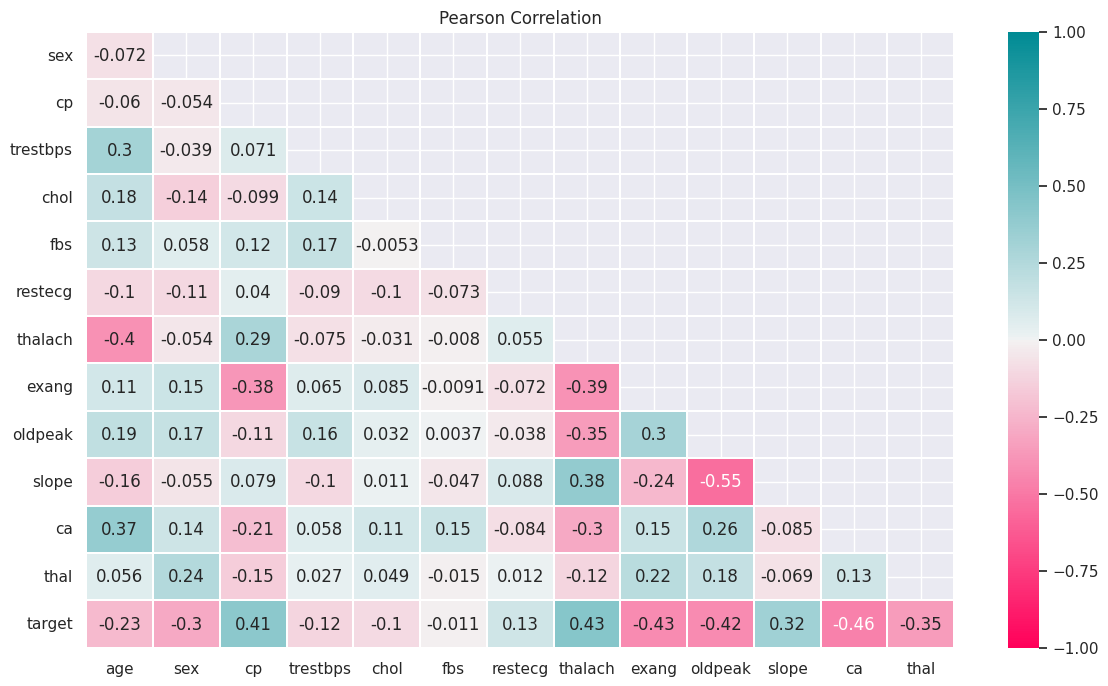

In [38]:
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

From above, the features fbs, chol and trestbps have the lowest correlation with target.

Text(0.5, 1.0, 'Spearman Correlation')

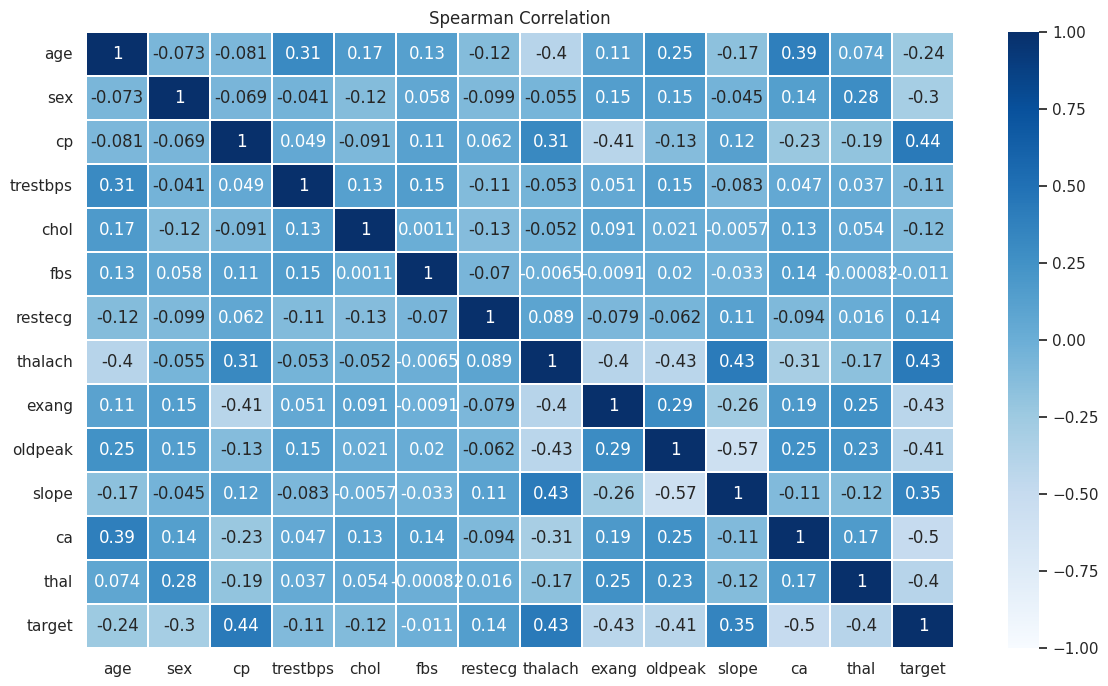

In [39]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

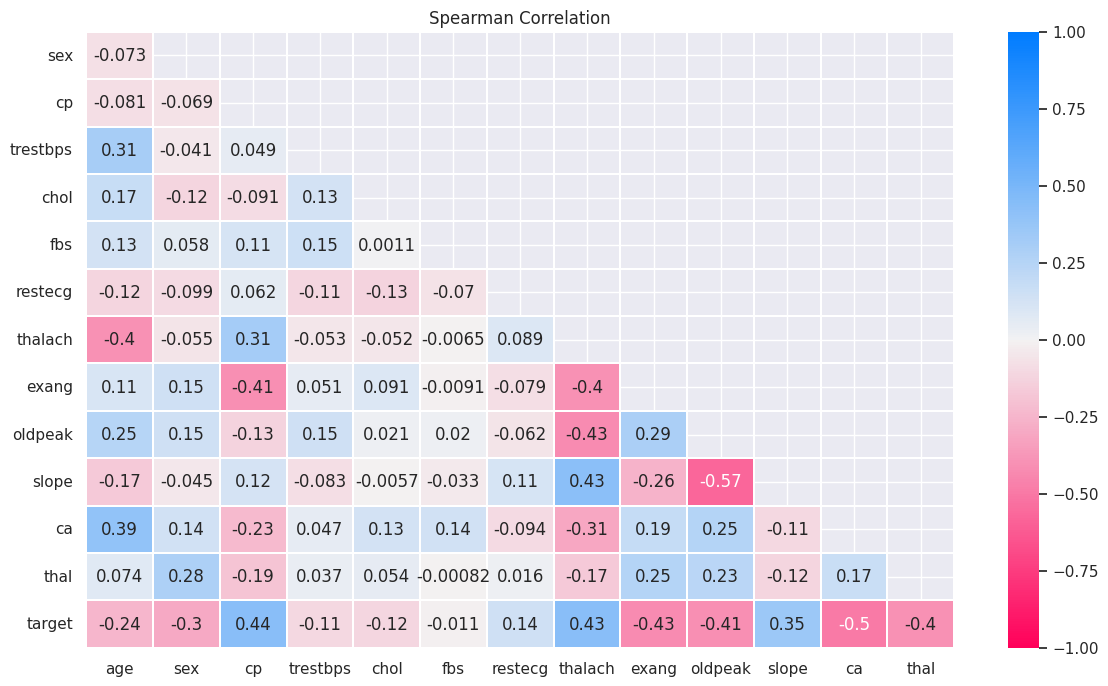

In [40]:
#Create mask for both correlation matrices
#Spearson corr masking
#Generating mask for upper triangle
maskS = np.triu(np.ones_like(spearmanCorr,dtype=bool))
#Adjust mask and correlation
maskS = maskS[1:,:-1]
sCorr = spearmanCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 250, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(sCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskS)
plt.title("Spearman Correlation")

From above, the features fbs, chol and trestbps have the lowest correlation with target.

Before implementing any boosting algorithm, we will divide our dataset into training data and test data. I have used 70% of the data for training and the remaining 30% will be used for testing.

From this we observe that the minimum correlation between output and other features in fbs,trestbps and chol

In [41]:
X = data3.loc[:, data.columns != 'target']
Y = data3['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [42]:
#Xed = data3.loc[:, data.columns != 'target']
Xed = data3.drop(data3.columns[[3, 4, 5, 13]], axis=1)
Yed = data3['target']

X_trained, X_tested, Y_trained, Y_tested = train_test_split(Xed, Yed, test_size = 0.3, random_state = 100)

## 1. AdaBoost Algorithm

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        43
           1       0.76      0.86      0.81        44

    accuracy                           0.79        87
   macro avg       0.80      0.79      0.79        87
weighted avg       0.80      0.79      0.79        87



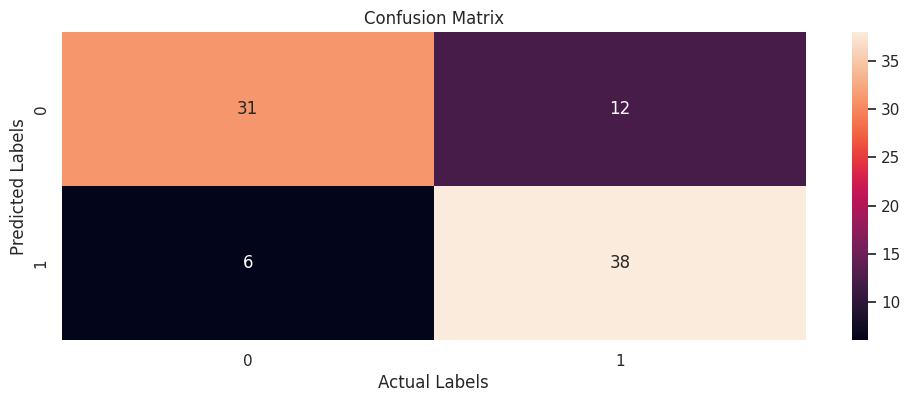

In [43]:
# Before removing features with low correlation

adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_train, Y_train)
ada_preds = adaboost.predict(X_test)

sns.heatmap(confusion_matrix(Y_test, ada_preds), annot=True)

plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

print(classification_report(Y_test, ada_preds))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        43
           1       0.76      0.89      0.82        44

    accuracy                           0.80        87
   macro avg       0.81      0.80      0.80        87
weighted avg       0.81      0.80      0.80        87



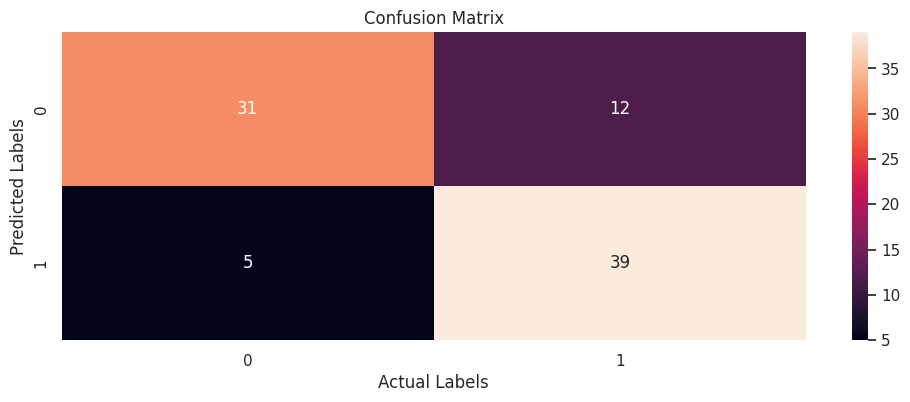

In [44]:
# After removing features with low correlation

adaboosted = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_trained, Y_trained)
ada_predsed = adaboosted.predict(X_tested)

sns.heatmap(confusion_matrix(Y_tested, ada_predsed), annot=True)

plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

print(classification_report(Y_tested, ada_predsed))

## 2. XGBoost Algoritm

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.74      0.77        43
           1       0.77      0.82      0.79        44

    accuracy                           0.78        87
   macro avg       0.78      0.78      0.78        87
weighted avg       0.78      0.78      0.78        87



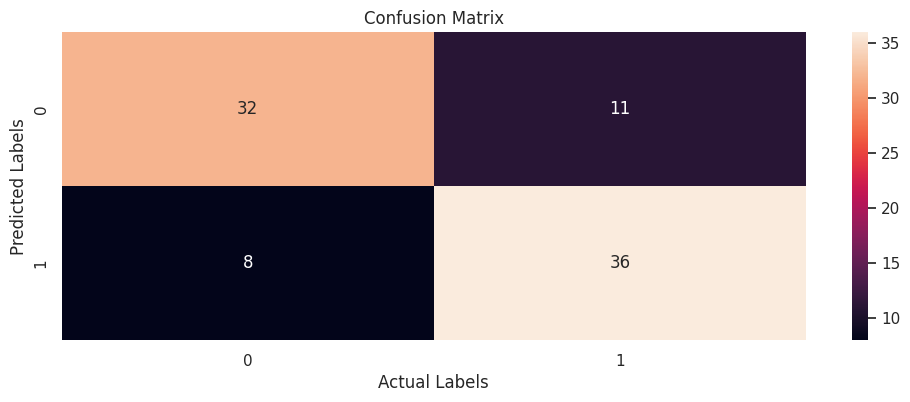

In [45]:
# Before removing features with low correlation

xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05).fit(X_train, Y_train, early_stopping_rounds = 5, eval_set = [(X_test, Y_test)],verbose = False)
xgb_preds = xgboost.predict(X_test)

sns.heatmap(confusion_matrix(Y_test, xgb_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

print(classification_report(Y_test, xgb_preds))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.77      0.80        43
           1       0.79      0.86      0.83        44

    accuracy                           0.82        87
   macro avg       0.82      0.82      0.82        87
weighted avg       0.82      0.82      0.82        87



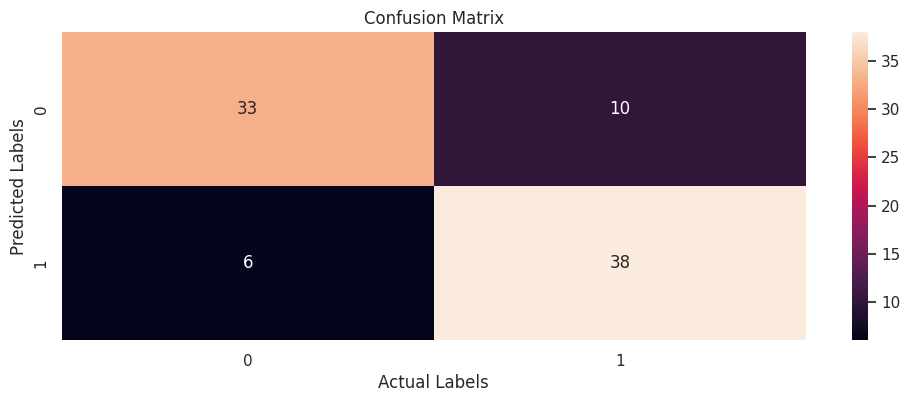

In [46]:
# After removing features with low correlation

xgboosted = XGBClassifier(n_estimators = 1000, learning_rate = 0.05).fit(X_trained, Y_trained, early_stopping_rounds = 5, eval_set = [(X_tested, Y_tested)],verbose = False)
xgb_predsed = xgboosted.predict(X_tested)

sns.heatmap(confusion_matrix(Y_tested, xgb_predsed),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

print(classification_report(Y_tested, xgb_predsed))

## 3. GradientBoost Algoritm

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.78      0.86      0.82        44

    accuracy                           0.80        87
   macro avg       0.81      0.80      0.80        87
weighted avg       0.81      0.80      0.80        87



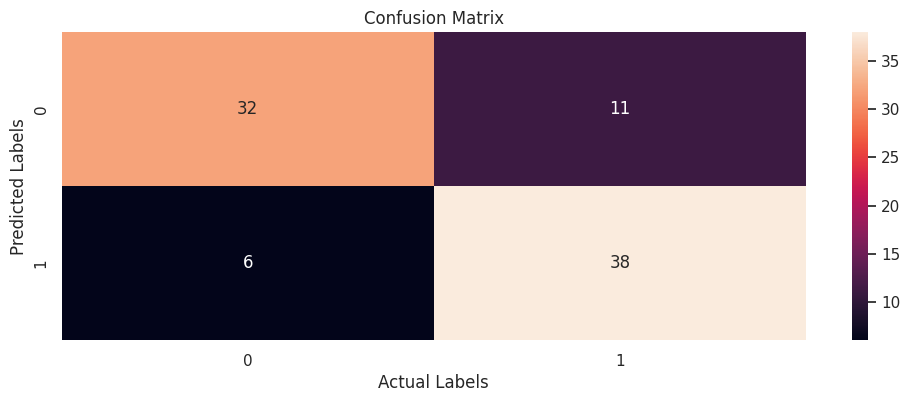

In [47]:
# Before removing features with low correlation

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 ).fit(X_train, Y_train)
gbc_preds = gbc.predict(X_test)

sns.heatmap(confusion_matrix(Y_test, gbc_preds),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

print(classification_report(Y_test, gbc_preds))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75        43
           1       0.74      0.89      0.80        44

    accuracy                           0.78        87
   macro avg       0.79      0.78      0.78        87
weighted avg       0.79      0.78      0.78        87



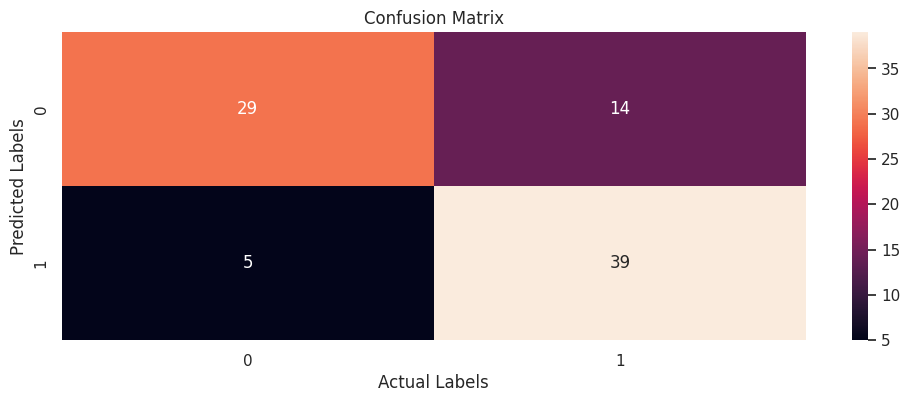

In [48]:
# After removing features with low correlation

gbced=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 ).fit(X_trained, Y_trained)
gbc_predsed = gbced.predict(X_tested)

sns.heatmap(confusion_matrix(Y_tested, gbc_predsed),
            annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

print(classification_report(Y_tested, gbc_predsed))

In [49]:
print("Accuracy value of boosting algoritm before removing features with low correlation")

print("Accuracy of AdaBoost Algorithm :: " , f"{metrics.accuracy_score(Y_test,ada_preds):.0%}")
print("Accuracy of XGBoost Algorithm :: " , f"{metrics.accuracy_score(Y_test,xgb_preds):.0%}")
print("Accuracy of GradientBoost Algorithm :: " , f"{metrics.accuracy_score(Y_test,gbc_preds):.0%}")

print("\nAccuracy value of boosting algoritm after removing features with low correlation \n")

print("Accuracy of AdaBoost Algorithm :: " , f"{metrics.accuracy_score(Y_tested,ada_predsed):.0%}")
print("Accuracy of XGBoost Algorithm :: " , f"{metrics.accuracy_score(Y_tested,xgb_predsed):.0%}")
print("Accuracy of GradientBoost Algorithm :: " , f"{metrics.accuracy_score(Y_tested,gbc_predsed):.0%}")

Accuracy value of boosting algoritm before removing features with low correlation
Accuracy of AdaBoost Algorithm ::  79%
Accuracy of XGBoost Algorithm ::  78%
Accuracy of GradientBoost Algorithm ::  80%

 Accuracy value of boosting algoritm after removing features with low correlation 

Accuracy of AdaBoost Algorithm ::  80%
Accuracy of XGBoost Algorithm ::  82%
Accuracy of GradientBoost Algorithm ::  78%


In [50]:
# Parameter Tuning

grid_random = {
    'learning_rate' : [0.01,0.05,0.1],
    'n_estimators' : np.arange(100,500,100),
    'random_state' : np.arange(100,500,100),
}

grid_depth = {
    'learning_rate' : [0.01,0.05,0.1],
    'n_estimators' : np.arange(100,500,100),
    'max_depth' : np.arange(1,9),
}

## AdaBoost Tuning

adab = AdaBoostClassifier()
adab_cv = GridSearchCV(adab, grid_random, cv = 4)
adab_cv.fit(X_train, Y_train)

adabed_cv = GridSearchCV(adab, grid_random, cv = 4)
adabed_cv.fit(X_trained, Y_trained)

## XGBoost Tuning

xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, grid_depth, cv = 4)
xgb_cv.fit(X_train, Y_train)

xgbed_cv = GridSearchCV(xgb, grid_depth, cv = 4)
xgbed_cv.fit(X_trained, Y_trained)

## GradientBoost Tuning

grab = GradientBoostingClassifier()
grab_cv = GridSearchCV(grab, grid_depth, cv = 4)
grab_cv.fit(X_train, Y_train)

grabed_cv = GridSearchCV(grab, grid_depth, cv = 4)
grabed_cv.fit(X_trained, Y_trained)

# Result
print("Before removing features with low correlation \n")
print("AdaBoost Classifier")
print("Best Parameters:",adab_cv.best_params_)
print("Train Score:",adab_cv.best_score_)
print("Test Score:",adab_cv.score(X_test,Y_test))
print("\n")

print("XGBoost Classifier")
print("Best Parameters:",xgb_cv.best_params_)
print("Train Score:",xgb_cv.best_score_)
print("Test Score:",xgb_cv.score(X_test,Y_test))
print("\n")

print("GradientBoost Classifier")
print("Best Parameters:",grab_cv.best_params_)
print("Train Score:",grab_cv.best_score_)
print("Test Score:",grab_cv.score(X_test,Y_test))
print("\n")

print("After removing features with low correlation \n")
print("AdaBoost Classifier")
print("Best Parameters:",adabed_cv.best_params_)
print("Train Score:",adabed_cv.best_score_)
print("Test Score:",adabed_cv.score(X_tested,Y_tested))
print("\n")

print("XGBoost Classifier")
print("Best Parameters:",xgbed_cv.best_params_)
print("Train Score:",xgbed_cv.best_score_)
print("Test Score:",xgbed_cv.score(X_tested,Y_tested))
print("\n")

print("GradientBoost Classifier")
print("Best Parameters:",grabed_cv.best_params_)
print("Train Score:",grabed_cv.best_score_)
print("Test Score:",grabed_cv.score(X_tested,Y_tested))

Before removing features with low correlation 

AdaBoost Classifier
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 400, 'random_state': 100}
Train Score: 0.865
Test Score: 0.7931034482758621


XGBoost Classifier
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
Train Score: 0.875
Test Score: 0.7816091954022989


GradientBoost Classifier
Best Parameters: {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 200}
Train Score: 0.865
Test Score: 0.8160919540229885
After removing features with low correlation 

AdaBoost Classifier
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 300, 'random_state': 100}
Train Score: 0.86
Test Score: 0.7931034482758621


XGBoost Classifier
Best Parameters: {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 400}
Train Score: 0.8749999999999999
Test Score: 0.8045977011494253


GradientBoost Classifier
Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
Train Score: 0.874999999999999